#INGENIERIA DE CARACTERÍSTICAS

<font size="4">
<p>
En este notebook se va a hacer un breve recorrido de lo que se conoce como analisis exploratorio de nuestros datos en donde podemos ver gráficamente la correlación entre las características y otros comportamiento fácilmente observables.
Seguidamente se darán las bases para entender los métodos de reducción de dimensionalidad como son análisis de componentes principales (en español ACP, en inglés, PCA) y Latent Dirichlet Allocation (LDA) .
</p>

<p>
El recorrido por éstos métodos se hará como a lo largo de todo el curso de una manera práctica que permita usar inmediatamente los conceptos adquiridos.
</p>
<br>

</font>

## 1. Análisis Exploratorio

<font size="4">
<p>
Hacer un análsis previo de los datos es fundamental, y en algunos casos determinante.
<p>
<p>
Una gráfica facilita la visualización de relaciones entre variables, ya sea que crecen proporcinalmente o no.
</p>
<p>Cuando observamos los datos podemos hacer hipotesis de su comportamiento, y más adelante con alguna técnica estadística que respaldar nuestros presupuestos.
</p>
<p>
En ésta sección se hará uso de la librería python seaborn library para el analsis exploratorio con un caso de uso de credit scoring.
</p>
<p>
Con el uso de ésta librería así como con pandas y numpy, vamos a ver que es posible producir gráficas estadísticas reveladoras con un mínimo de código. 
</p>
</font>



### 1.1 Credit Scoring

<p>Este dataset de credit scoring fue elaborado por el profesor Professor Dr. Hans Hofmann [REF] el cual contiene ejemplos 
de personas catalogadas con alto y bajo riesgo en la petición de un crédito financiero.
</p>
https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)


### Paso 1. Leer Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [28]:
Data = pd.read_csv("/german_credit_data.csv")
print (Data.columns)
Data.head(5)

Index(['Client id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Class'],
      dtype='object')


,Client id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Class
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


Se puede observar que hay variables que no son numéricas, sino que categóricas. Por ejemplo Purpose, que se refiere a la intención del crédito.

In [29]:
print("Purpose : ",Data.Purpose.unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


En muchos datasets vas a encontrar datos nulos que en python tiene el formato de NAN, para evitar errores de procesamiento eliminamos los registros que tengan datos NAN.

In [26]:
Data = Data.dropna() # borra los registros que estan en NA

In [27]:
Data.head(5)

,Client id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Class
1,1,22,1,2,0,0,1,5951,48,0,0
3,3,45,0,2,1,0,0,7882,42,2,1
4,4,53,0,2,1,0,0,4870,24,3,0
7,7,35,0,3,2,0,1,6948,36,3,1
9,9,28,0,3,0,0,1,5234,30,3,0


Las variables categoricas es necesario volverlas numéricas para más adelante procesarlas por alguno de los métodos de ML.

In [8]:
Data_proc = pd.DataFrame(Data)
Data_proc['Saving accounts'] = Data['Saving accounts'].map({"little":0,"moderate":1,"quite rich":2 ,"rich":3 });
Data_proc['Saving accounts'] = Data['Saving accounts'].map({"little":0,"moderate":1,"quite rich":2 ,"rich":3 });
Data_proc['Checking account'] = Data['Checking account'].map({"little":0,"moderate":1,"rich":2 })
Data_proc['Sex'] = Data['Sex'].map({"male":0,"female":1});
Data_proc['Housing'] = Data['Housing'].map({"own":0,"free":1,"rent":2});
Data_proc['Purpose'] = Data['Purpose'].map({'radio/TV':0, 'education':1, 'furniture/equipment':2, 'car':3, 'business':4,
       'domestic appliances':5, 'repairs':6, 'vacation/others':7});
Data_proc['Class'] = Data['Class'].map({'bad':0, 'good':1});

In [9]:
Data_proc.head(5)

,Client id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Class
1,1,22,1,2,0,0,1,5951,48,0,0
3,3,45,0,2,1,0,0,7882,42,2,1
4,4,53,0,2,1,0,0,4870,24,3,0
7,7,35,0,3,2,0,1,6948,36,3,1
9,9,28,0,3,0,0,1,5234,30,3,0


Veamos cómo está distribuida el tipo de vivienda de los usaurios (propia, renta, gratis)

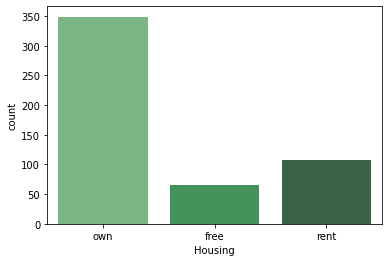

In [10]:
sns.countplot(x="Housing", data=Data, palette="Greens_d");

Vamos a ver que relación hay entre el tipo de vivienda y la edad.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


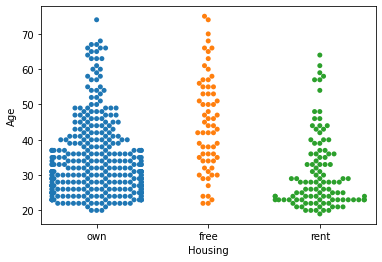

In [11]:
sns.swarmplot(x="Housing", y="Age", data=Data);

Ya que información en la gráfica de puntos puede ser limitado, intentemos graficar la distribución de los datos con gràficas de cajas.

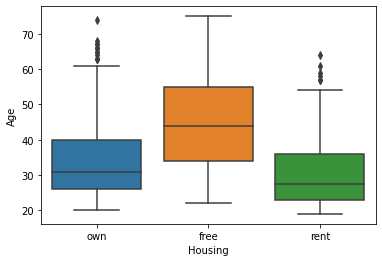

In [12]:
sns.boxplot(x="Housing", y="Age", data=Data);

De acá podemos concluir que la mayoría de las personas entre 20 y 30 viven en arriendo, los que están entre 30 y 40 viven en casa propia y aquellos que viven en casas gratis están entre 35 y 50 con media en 45 aproximadamente.

Ahora combinemos las observaciones con el comportamiento de pago.

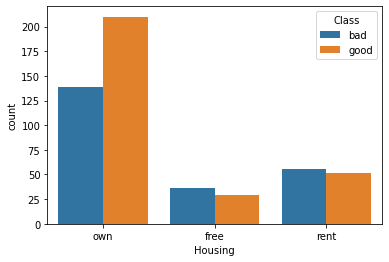

In [13]:
sns.countplot(x="Housing", hue="Class", data=Data);

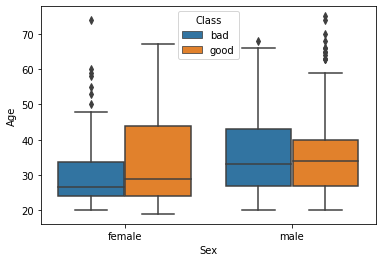

In [14]:
sns.boxplot(x="Sex", y="Age", hue="Class", data=Data);

Finalmente podemos graficar todas las variables correlacionadas a la vez.

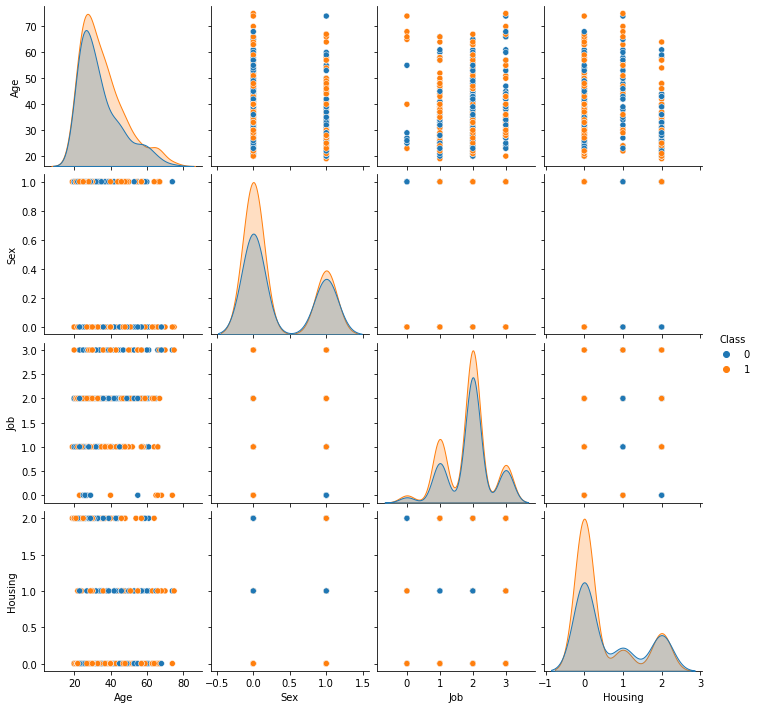

In [15]:
sns.pairplot(Data[['Age','Sex','Job','Housing','Class']],hue='Class')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

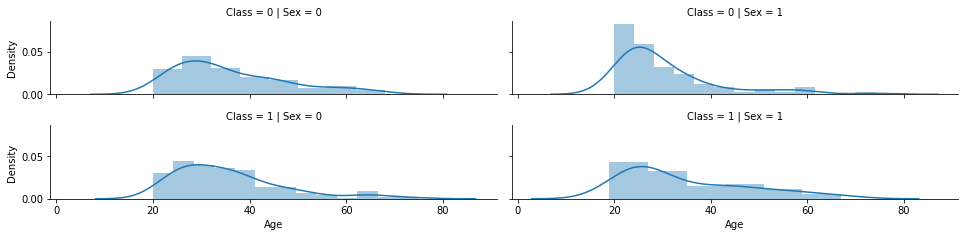

In [16]:
g = sns.FacetGrid(Data, col="Sex", row = 'Class', size=1.7, aspect=4,)
g.map(sns.distplot, "Age", hist=True, rug=False)

# INGENIERIA DE CARACTERÍSTICAS

<BR>

# Taller 1 

<font size="4">
<p> <b>Pregunta 1</b><br>
<p> Analice la correlación que hay entre el propósito del crédito <i>{'radio/TV', 'education', 'furniture/equipment', 'car', 'business','domestic appliances', 'repairs', 'vacation/others'}</i> y el resultado de pago <i>{'good', 'bad'}</i>.</p>
</font>

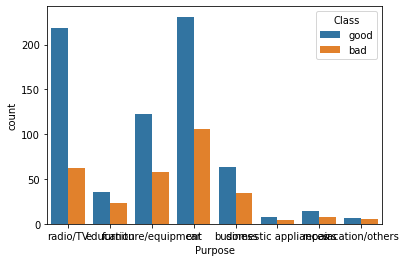

In [30]:
sns.countplot(x="Purpose", hue="Class", data=Data);


In [ ]:
radio 20%, car 30%, vac 50%

In [31]:
print("Purpose : ",Data.Purpose.unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


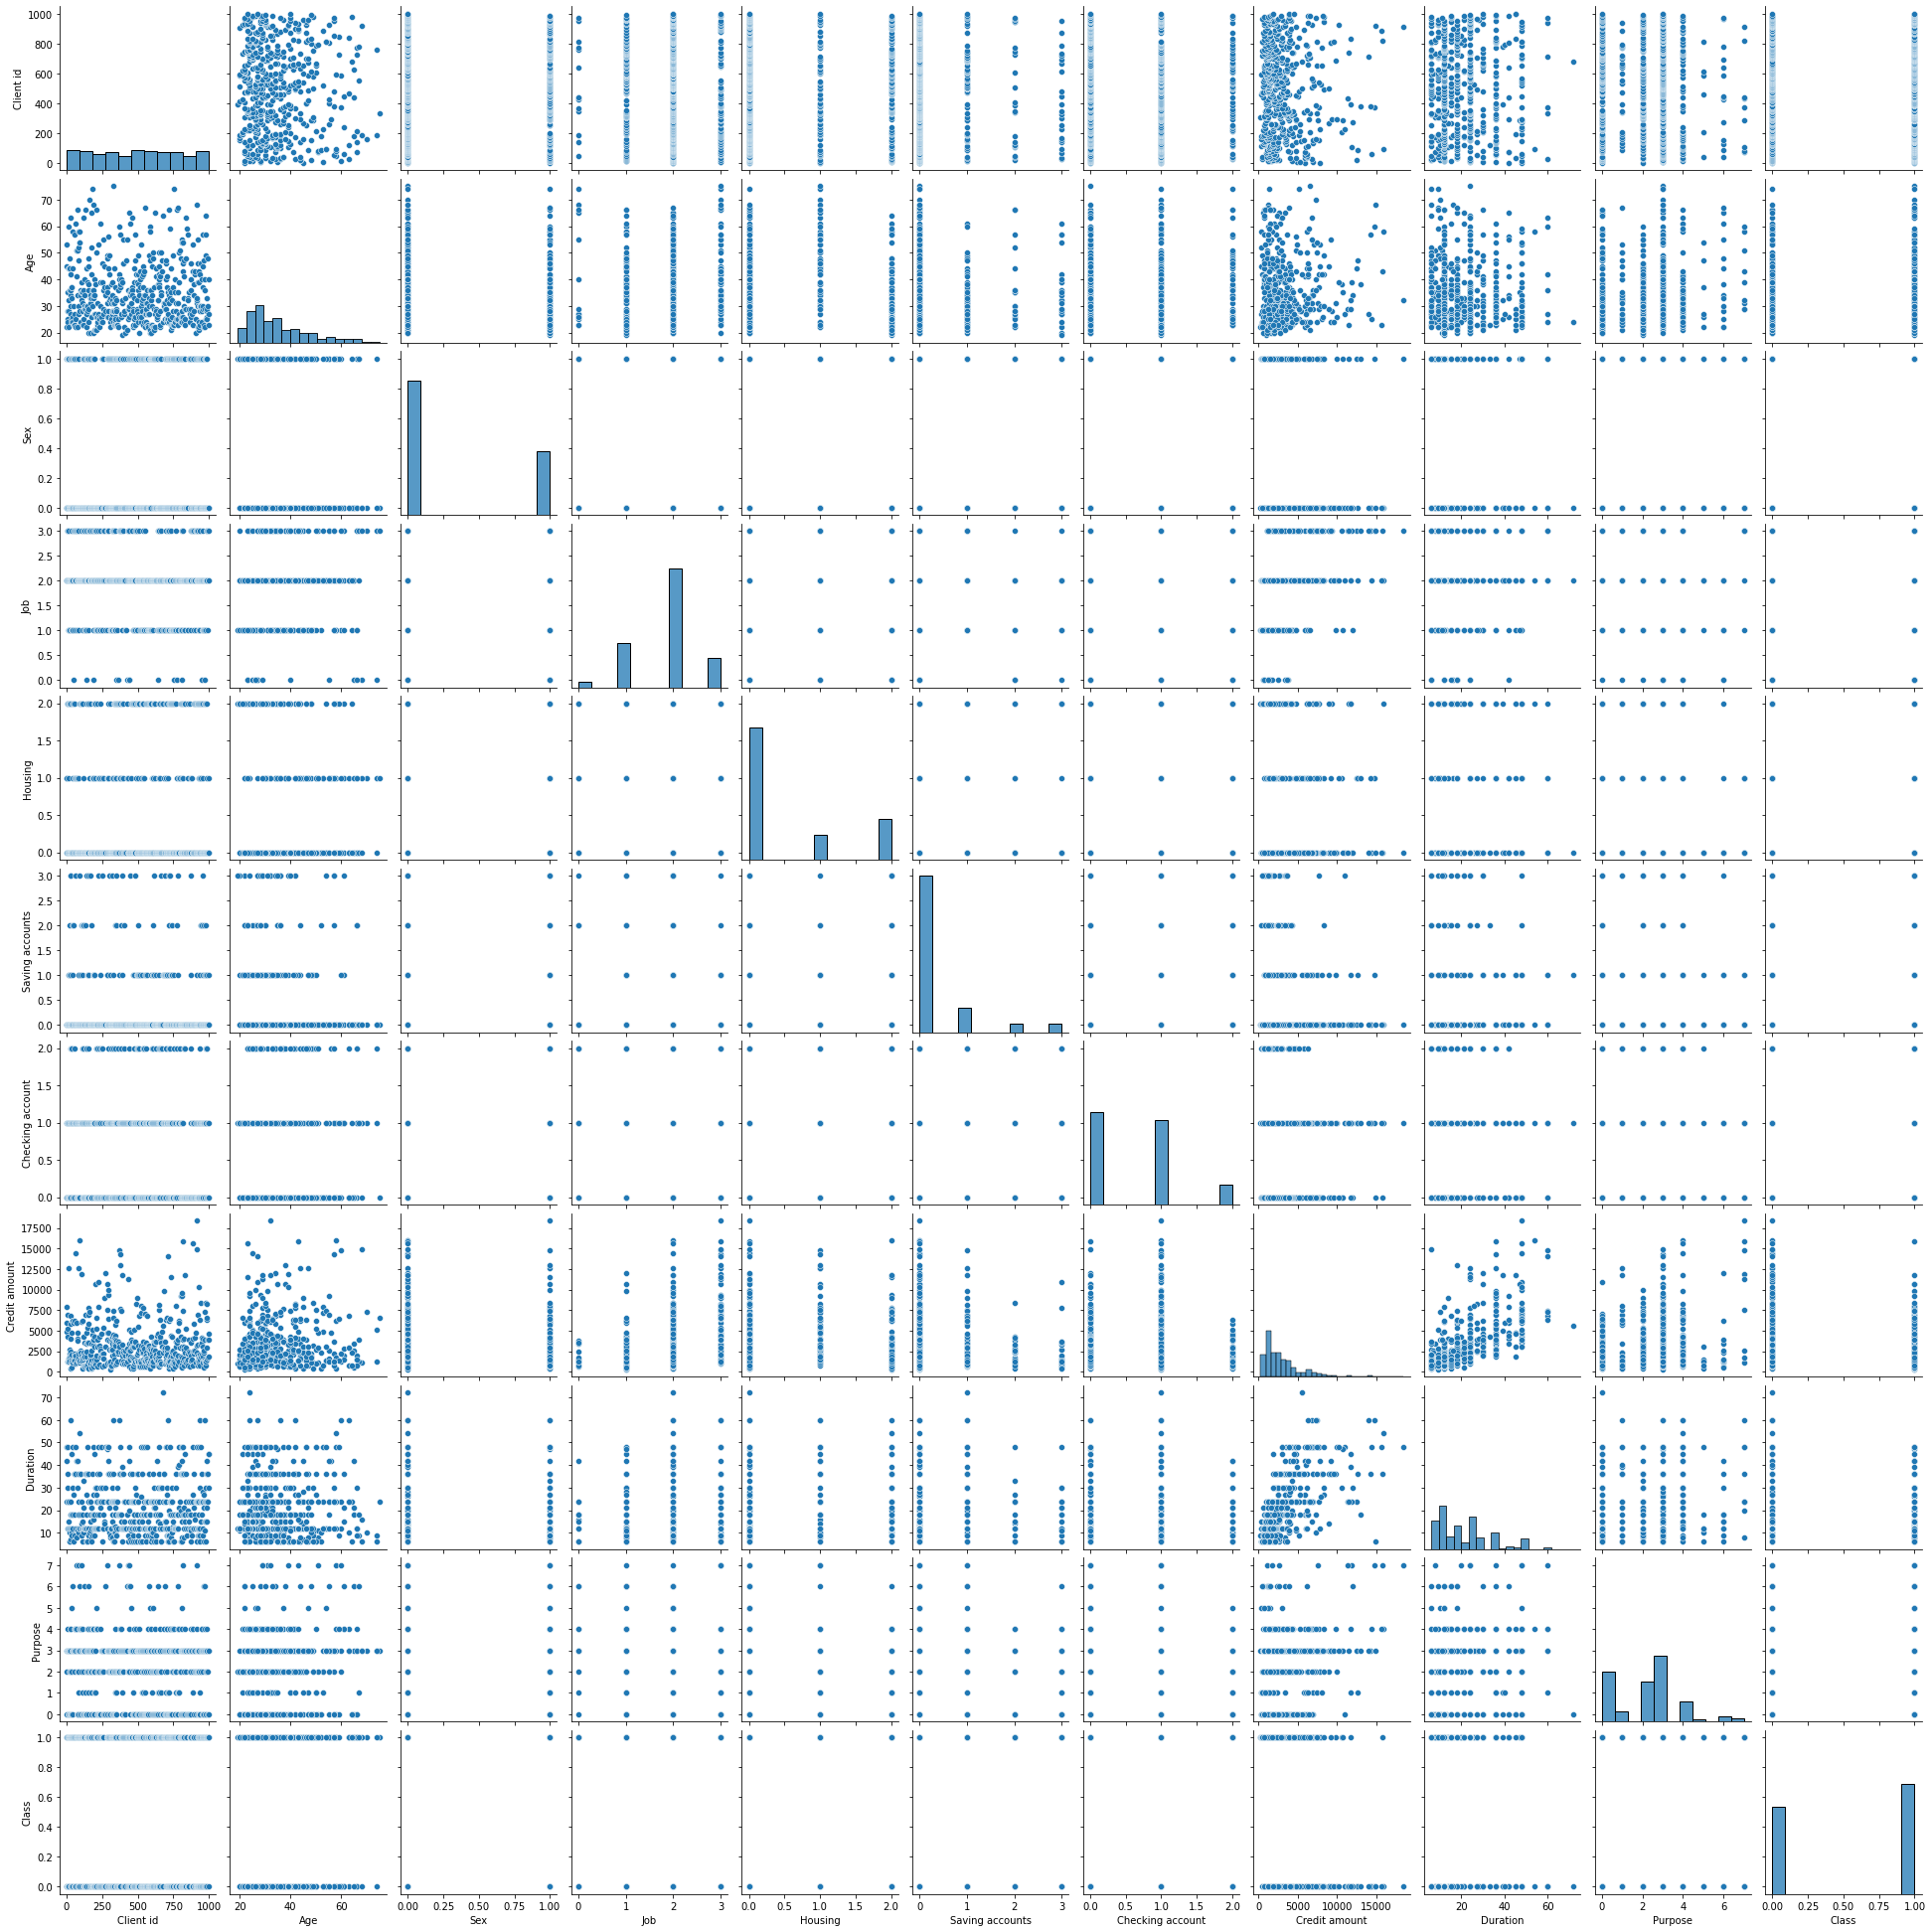

In [17]:
sns.pairplot(Data)

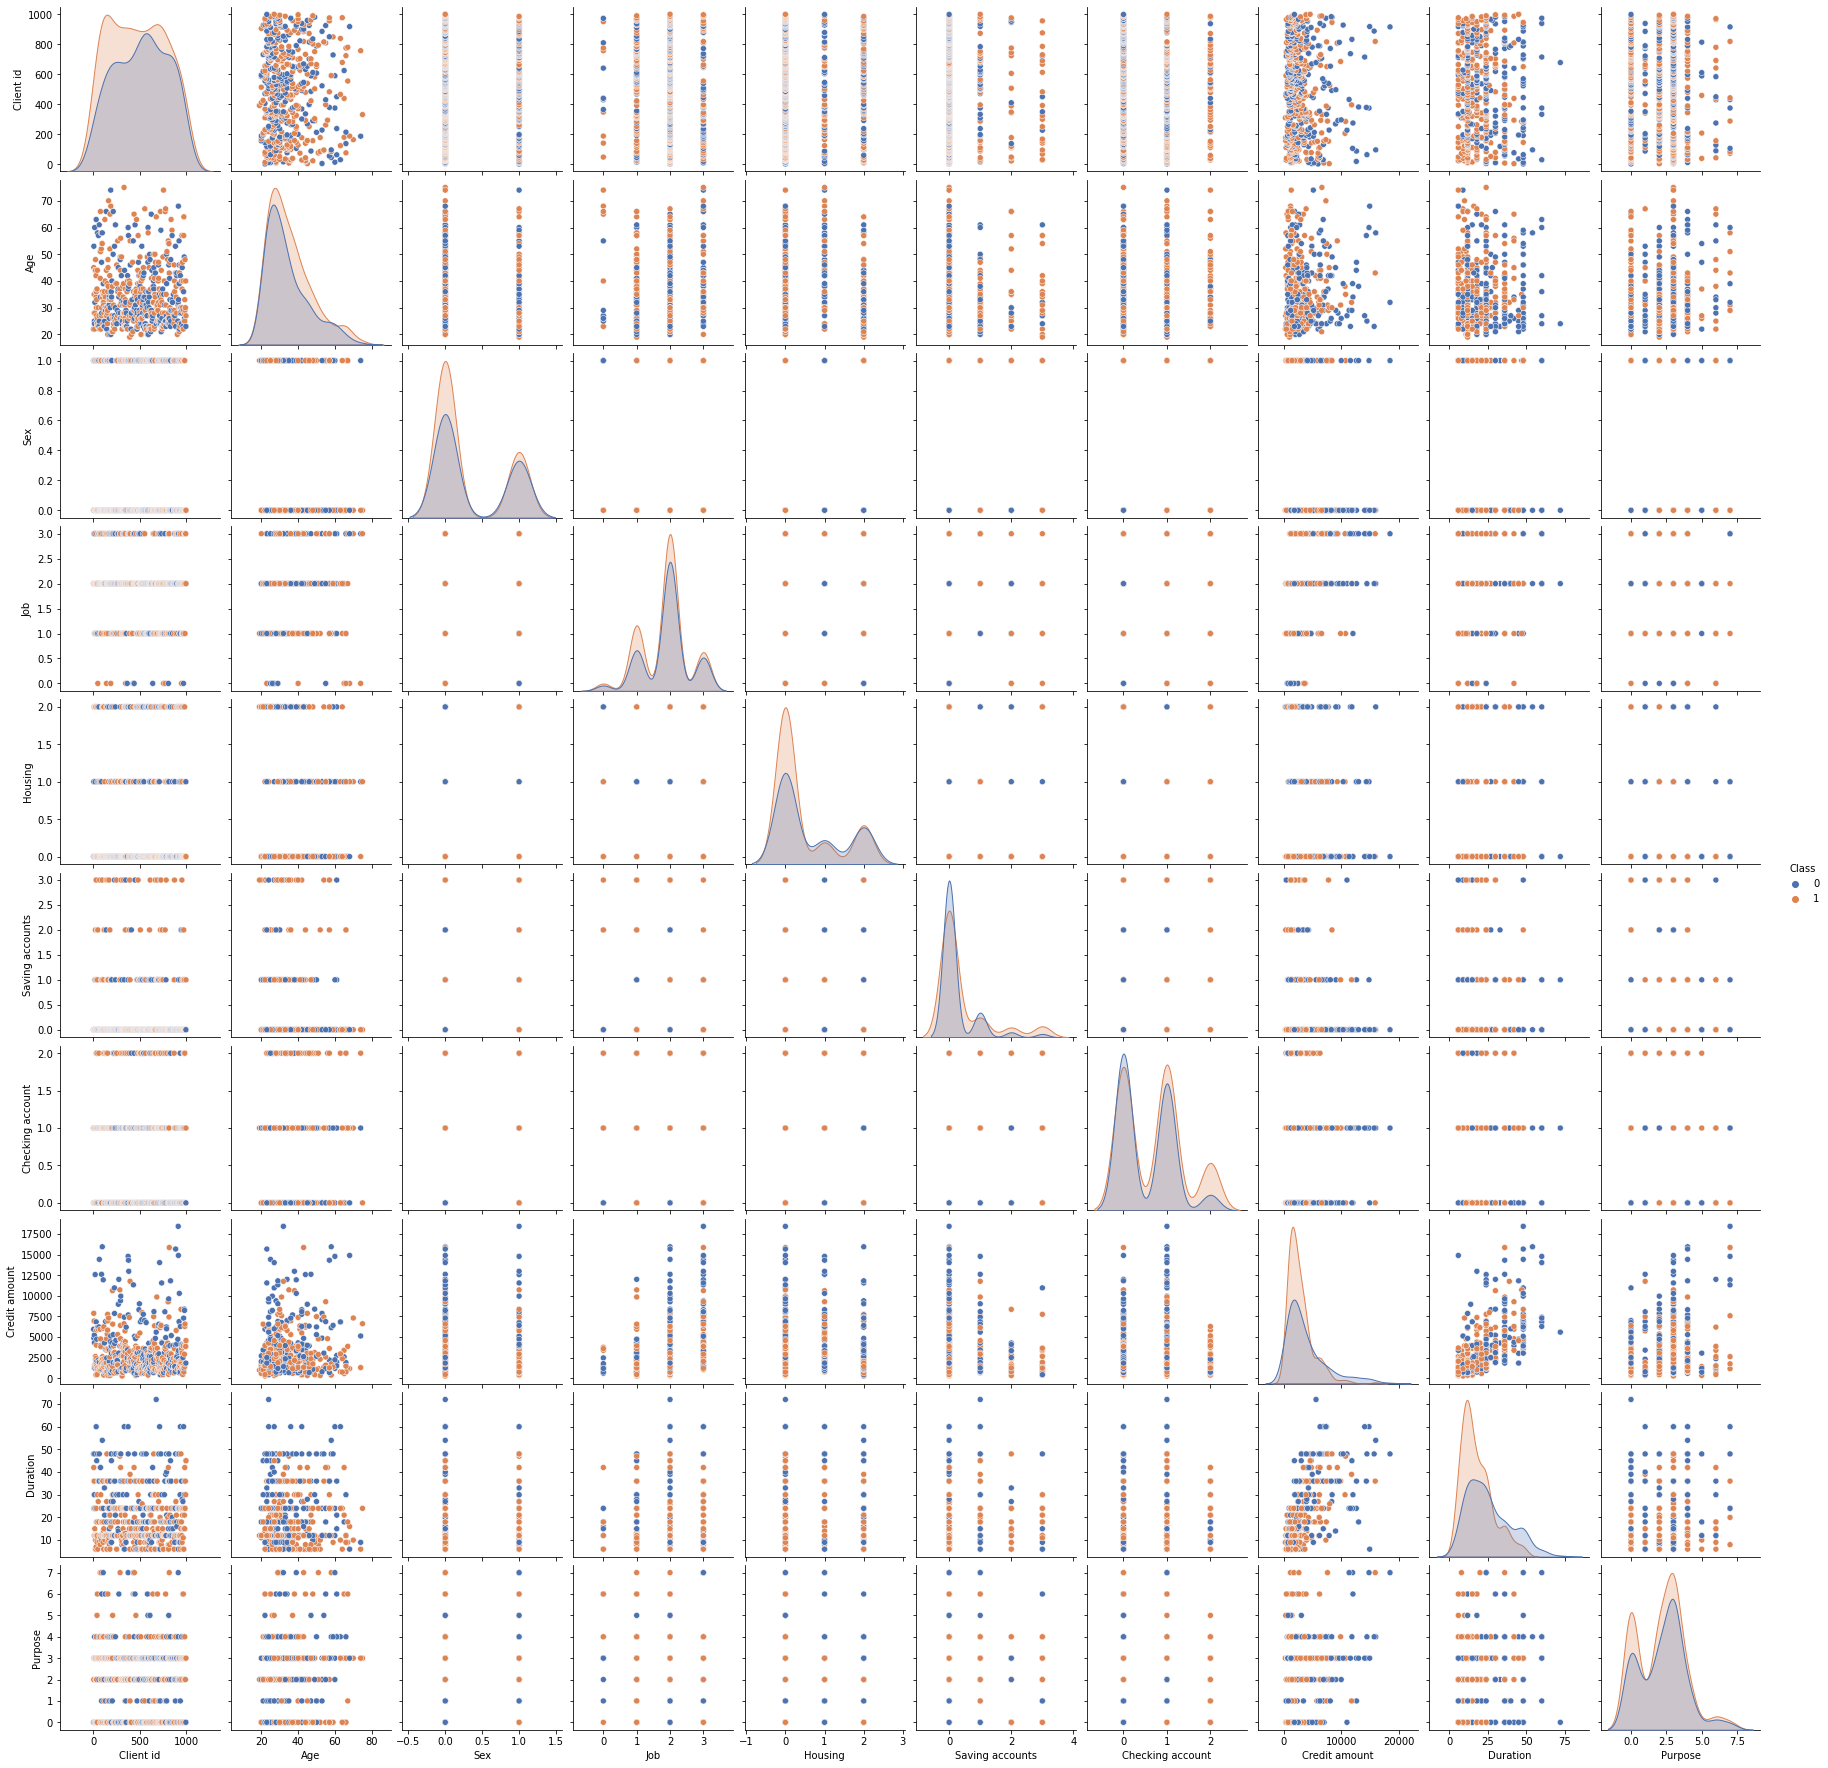

In [19]:
sns.pairplot(Data, hue='Class', palette='deep')

<font size="4">
<p> <b>Pregunta 2</b><br>
<p> Analice la correlación que hay entre el propósito del crédito <i>{'radio/TV', 'education', 'furniture/equipment', 'car', 'business','domestic appliances', 'repairs', 'vacation/others'}</i> y la edad y sexo de los aspirantes al crédito.</p>
</font>

In [44]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

perc0 = np.percentile(Data['Age'], 0)
perc20 = np.percentile(Data['Age'], 20)
perc40 = np.percentile(Data['Age'], 40)
perc60 = np.percentile(Data['Age'], 60)
perc80 = np.percentile(Data['Age'], 80)
perc100= np.percentile(Data['Age'], 100)


In [46]:
RangoEdad = if Data['Age'] <= perc20: perc0 & "-" & perc20 

SyntaxError: ignored

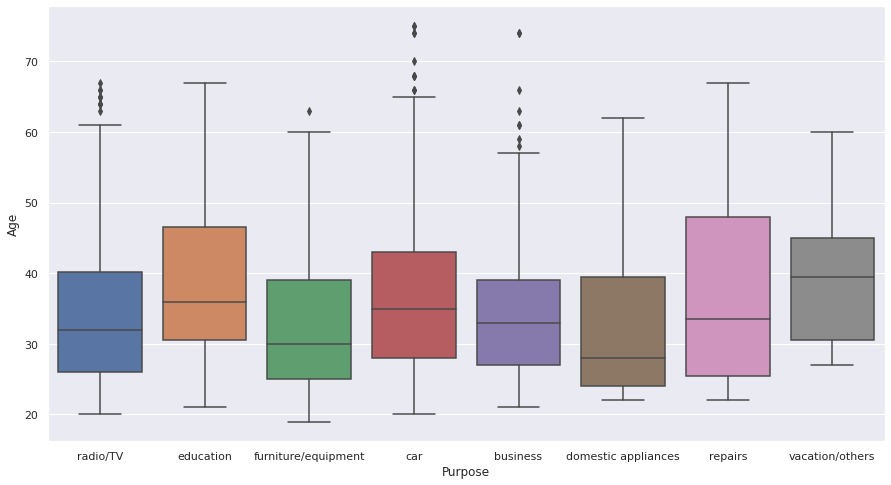

In [55]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x="Purpose", y="Age", data=Data);



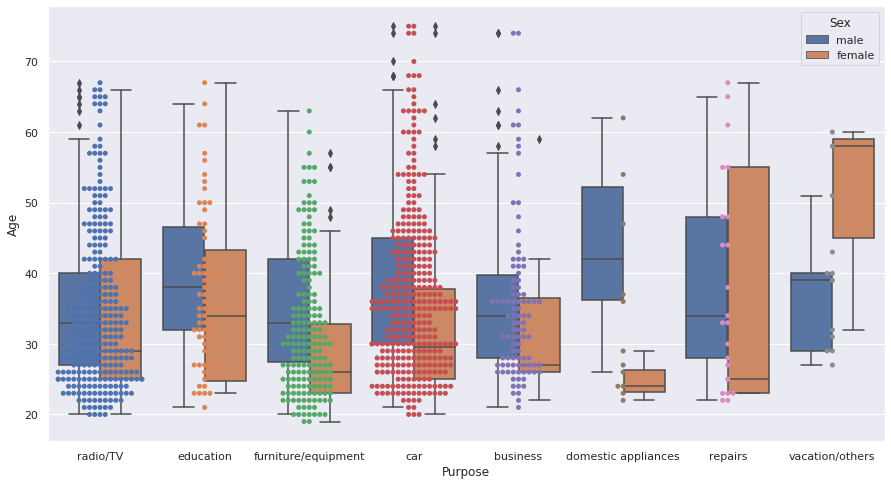

In [60]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x="Purpose", y= "Age", hue="Sex", data=Data);
sns.swarmplot(x="Purpose", y= "Age", data=Data);

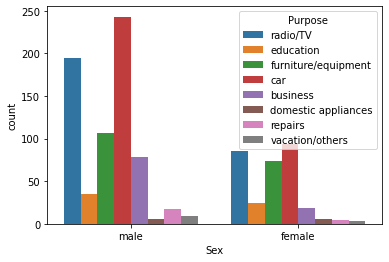

In [47]:
sns.countplot(x="Sex", hue="Purpose", data=Data);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

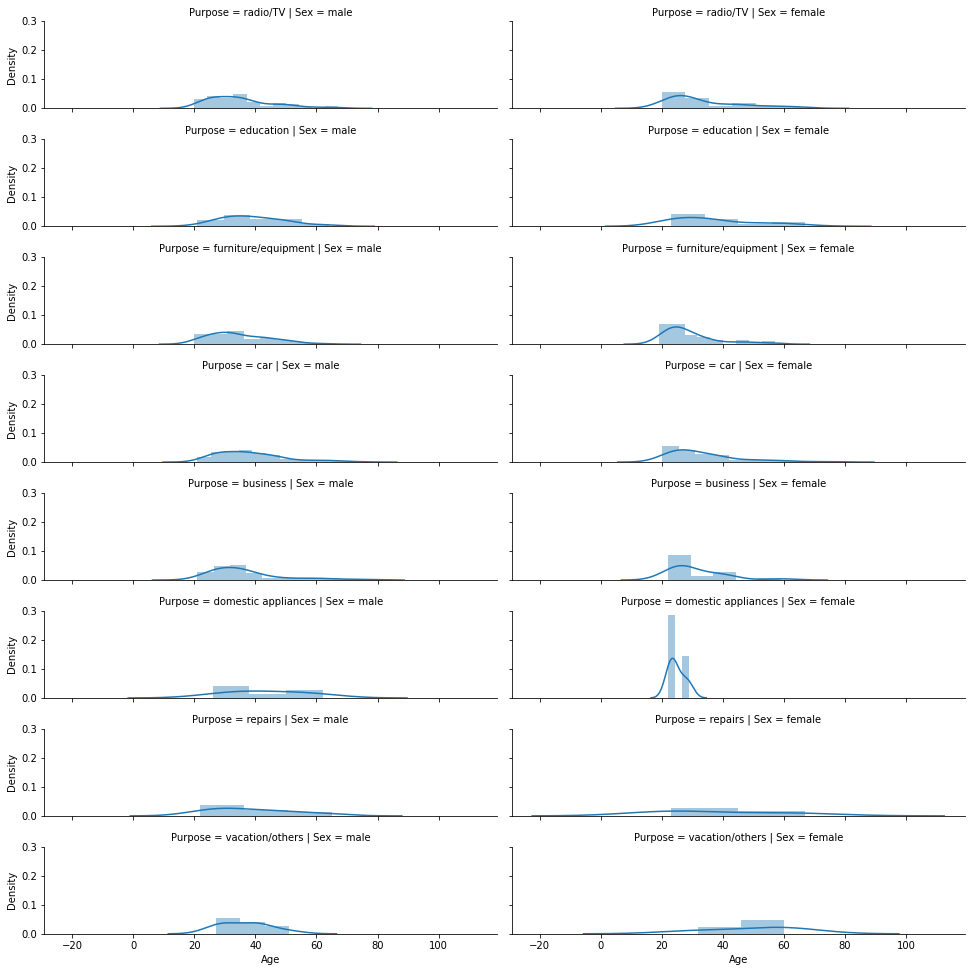

In [50]:
g = sns.FacetGrid(Data, col="Sex", row = 'Purpose', size=1.7, aspect=4,)
g.map(sns.distplot, "Age", hist=True, rug=False)

<font size="4">
<p> <b>Pregunta 3</b><br>
<p>Transforme las caracteristicas numérica del dataset (german.data-numeric.csv) en un espacio tridimensional que permita clasificar (usando regresion logistica) con por lo menos un 70% de confiabilidad un buen deudor o un mal deudor.</p>
<p><i>Use sklearn.</i></p>
</font>


# Referencias

* Raschka, S. (2015). Python machine learning. Packt Publishing Ltd.
* Press, G. (2013, December 21). A Very Short History Of Big Data. Retrieved July 31, 2017, from https://www.forbes.com/sites/gilpress/2013/05/09/a-very-short-history-of-big-data
* Murphy, K. P. (2013). Machine learning: a probabilistic perspective. Cambridge, Mass.: MIT Press.
* Sugiyama, M. (2016). Introduction to statistical machine learning. Waltham, Ma.: Morgan Kaufmann, Elsevier.

In [18]:
Data2 = pd.read_csv("/housingdata.csv")
print (Data2.columns)
Data2.head(5)

Index(['0.00632', '18', '2.31', '0', '0.538', '6.575', '65.2', '4.09', '1',
       '296', '15.3', '396.9', '4.98', '24'],
      dtype='object')


,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
